## Aufgabe 3

Importiere Bibliotheken

In [7]:
# Importiere Bibliotheken
import time
import multiprocessing

import pandas as pd

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

Lade Datensatz

In [8]:
bc = datasets.load_breast_cancer()
print(bc.data.shape)
print(bc.target.shape)

(569, 30)
(569,)


Iteriere durch die Anzahl der vorhandenen Prozessorkerne und starte jeweils ein GridSearch. Miss jeweils die notwendige Zeit für das Fitting und speicher Ergebnis in eine Liste.

In [18]:
# Variablen
times = []
cores = []

# Zu testende Hyperparameter
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# Anzahl der Prozessorkerne
n_cores = multiprocessing.cpu_count()

for n in range(1, n_cores+1):

    # SVM als Klassifikator
    svc = svm.SVC()

    # GridSearch starten
    clf = GridSearchCV(svc, parameters, n_jobs=n)
    
    # Startzeit
    start = time.time()
    
    # Modell trainieren
    clf.fit(bc.data, bc.target)
    
    # Endzeit
    end = time.time()
    
    cores.append(n)
    times.append(end - start)

    results = pd.DataFrame(data=clf.cv_results_)

# Ergebnissliste in DataFrame umwandeln
d = {'times': times, 'n_cores': cores}
df = pd.DataFrame(data=d)

/home/dominik/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/dominik/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/dominik/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/dominik/anaconda3/lib/py

Plotte die benötigte Zeit in Abhängigkeit zur Anzahl der Kerne

[Text(0,0.5,'Time in seconds'), Text(0.5,0,'#Cores')]

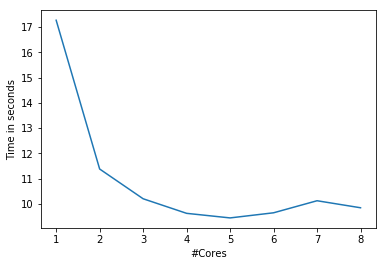

In [19]:
plot = df.plot(x='n_cores', y='times', legend=False)
plot.set(xlabel="#Cores", ylabel="Time in seconds")

Plotte die Ergebnisse der letzten Iteration, also mit allen Kernels

In [20]:
print(results)

   mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0       1.322889         0.000621         0.950791          0.969238       1   
1       0.014506         0.004957         0.627417          1.000000       1   
2       3.687682         0.000523         0.954306          0.971877      10   
3       0.012760         0.004671         0.627417          1.000000      10   

  param_kernel                         params  rank_test_score  \
0       linear   {'C': 1, 'kernel': 'linear'}                2   
1          rbf      {'C': 1, 'kernel': 'rbf'}                3   
2       linear  {'C': 10, 'kernel': 'linear'}                1   
3          rbf     {'C': 10, 'kernel': 'rbf'}                3   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.936842            0.973615           0.968421   
1           0.626316            1.000000           0.626316   
2           0.952632            0.978892           0.957895   
3           0.62